In [3]:
import math
import random
import pickle
import itertools
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 
from sklearn.utils import shuffle
from scipy.signal import resample
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.preprocessing import OneHotEncoder
from keras.models import Model
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, Softmax, Add, Flatten, Activation# , Dropout
from keras import backend as K
#from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
np.random.seed(42)
import tensorflow as tf
import tensorflow.keras as keras

In [4]:
mit_train_data = pd.read_csv("mitbih_train.csv", header = None)
mit_test_data = pd.read_csv("mitbih_test.csv", header = None)

In [5]:
# Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
# -N : Non-ecotic beats (normal beat) -S : Supraventricular ectopic beats -V : Ventricular ectopic beats -F : Fusion Beats -Q : Unknown Beats
mit_test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21892 entries, 0 to 21891
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 31.4 MB


In [6]:
mit_test_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [7]:
mit_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [8]:
mit_train_data.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64

In [9]:
train_data = mit_train_data.copy()
test_data = mit_test_data.copy()

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
train_data.fillna(train_data.mean(), inplace=True)
# count the number of NaN values in each column
print(train_data.isnull().sum())

train_data.head()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
test_data.fillna(test_data.mean(), inplace=True)
# count the number of NaN values in each column
print(test_data.isnull().sum())

test_data.head()

0      0
1      0
2      0
3      0
4      0
      ..
183    0
184    0
185    0
186    0
187    0
Length: 188, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
# Resampling
from sklearn.utils import resample

df_1=train_data[train_data[187]==1]
df_2=train_data[train_data[187]==2]
df_3=train_data[train_data[187]==3]
df_4=train_data[train_data[187]==4]
df_0=(train_data[train_data[187]==0]).sample(n=18000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=18000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=18000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=18000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=18000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])


df_11=test_data[test_data[187]==1]
df_22=test_data[test_data[187]==2]
df_33=test_data[test_data[187]==3]
df_44=test_data[test_data[187]==4]
df_00=(test_data[test_data[187]==0]).sample(n=18000,random_state=42)

df_11_upsample=resample(df_11,replace=True,n_samples=18000,random_state=123)
df_22_upsample=resample(df_22,replace=True,n_samples=18000,random_state=124)
df_33_upsample=resample(df_33,replace=True,n_samples=18000,random_state=125)
df_44_upsample=resample(df_44,replace=True,n_samples=18000,random_state=126)

test_df=pd.concat([df_00,df_11_upsample,df_22_upsample,df_33_upsample,df_44_upsample])


equilibre=train_df[187].value_counts()
print(equilibre)

0.0    18000
1.0    18000
2.0    18000
3.0    18000
4.0    18000
Name: 187, dtype: int64


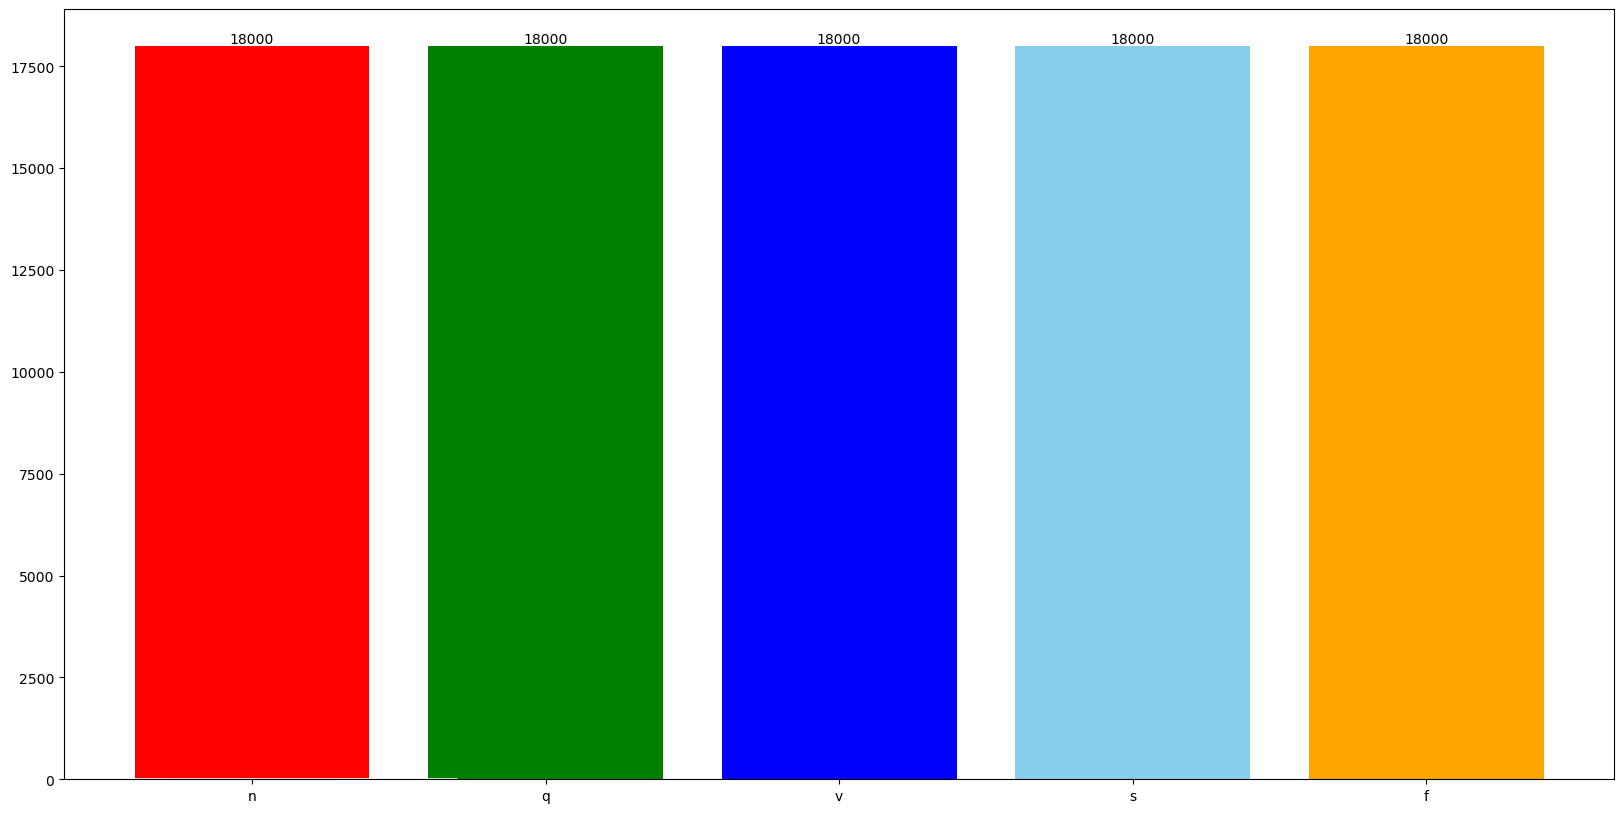

In [14]:
plt.figure(figsize=(20,10))

bars = plt.bar(equilibre.index, equilibre.values,
               color=['red','green','blue','skyblue','orange'])

circle=plt.Circle((0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(circle)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             yval + 0.005, round(yval, 1),
             ha='center', va='bottom')

plt.xticks(equilibre.index, ['n','q','v','s','f'])

plt.show()

In [15]:
print("ALL Train data")
print("Type\tCount")
print((mit_train_data[187]).value_counts())
print("-------------------------")
print("ALL Test data")
print("Type\tCount")
print((mit_test_data[187]).value_counts())

print("ALL Balanced Train data")
print("Type\tCount")
print((train_df[187]).value_counts())
print("-------------------------")
print("ALL Balanced Test data")
print("Type\tCount")
print((train_df[187]).value_counts())

ALL Train data
Type	Count
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64
-------------------------
ALL Test data
Type	Count
0.0    18118
4.0     1608
2.0     1448
1.0      556
3.0      162
Name: 187, dtype: int64
ALL Balanced Train data
Type	Count
0.0    18000
1.0    18000
2.0    18000
3.0    18000
4.0    18000
Name: 187, dtype: int64
-------------------------
ALL Balanced Test data
Type	Count
0.0    18000
1.0    18000
2.0    18000
3.0    18000
4.0    18000
Name: 187, dtype: int64


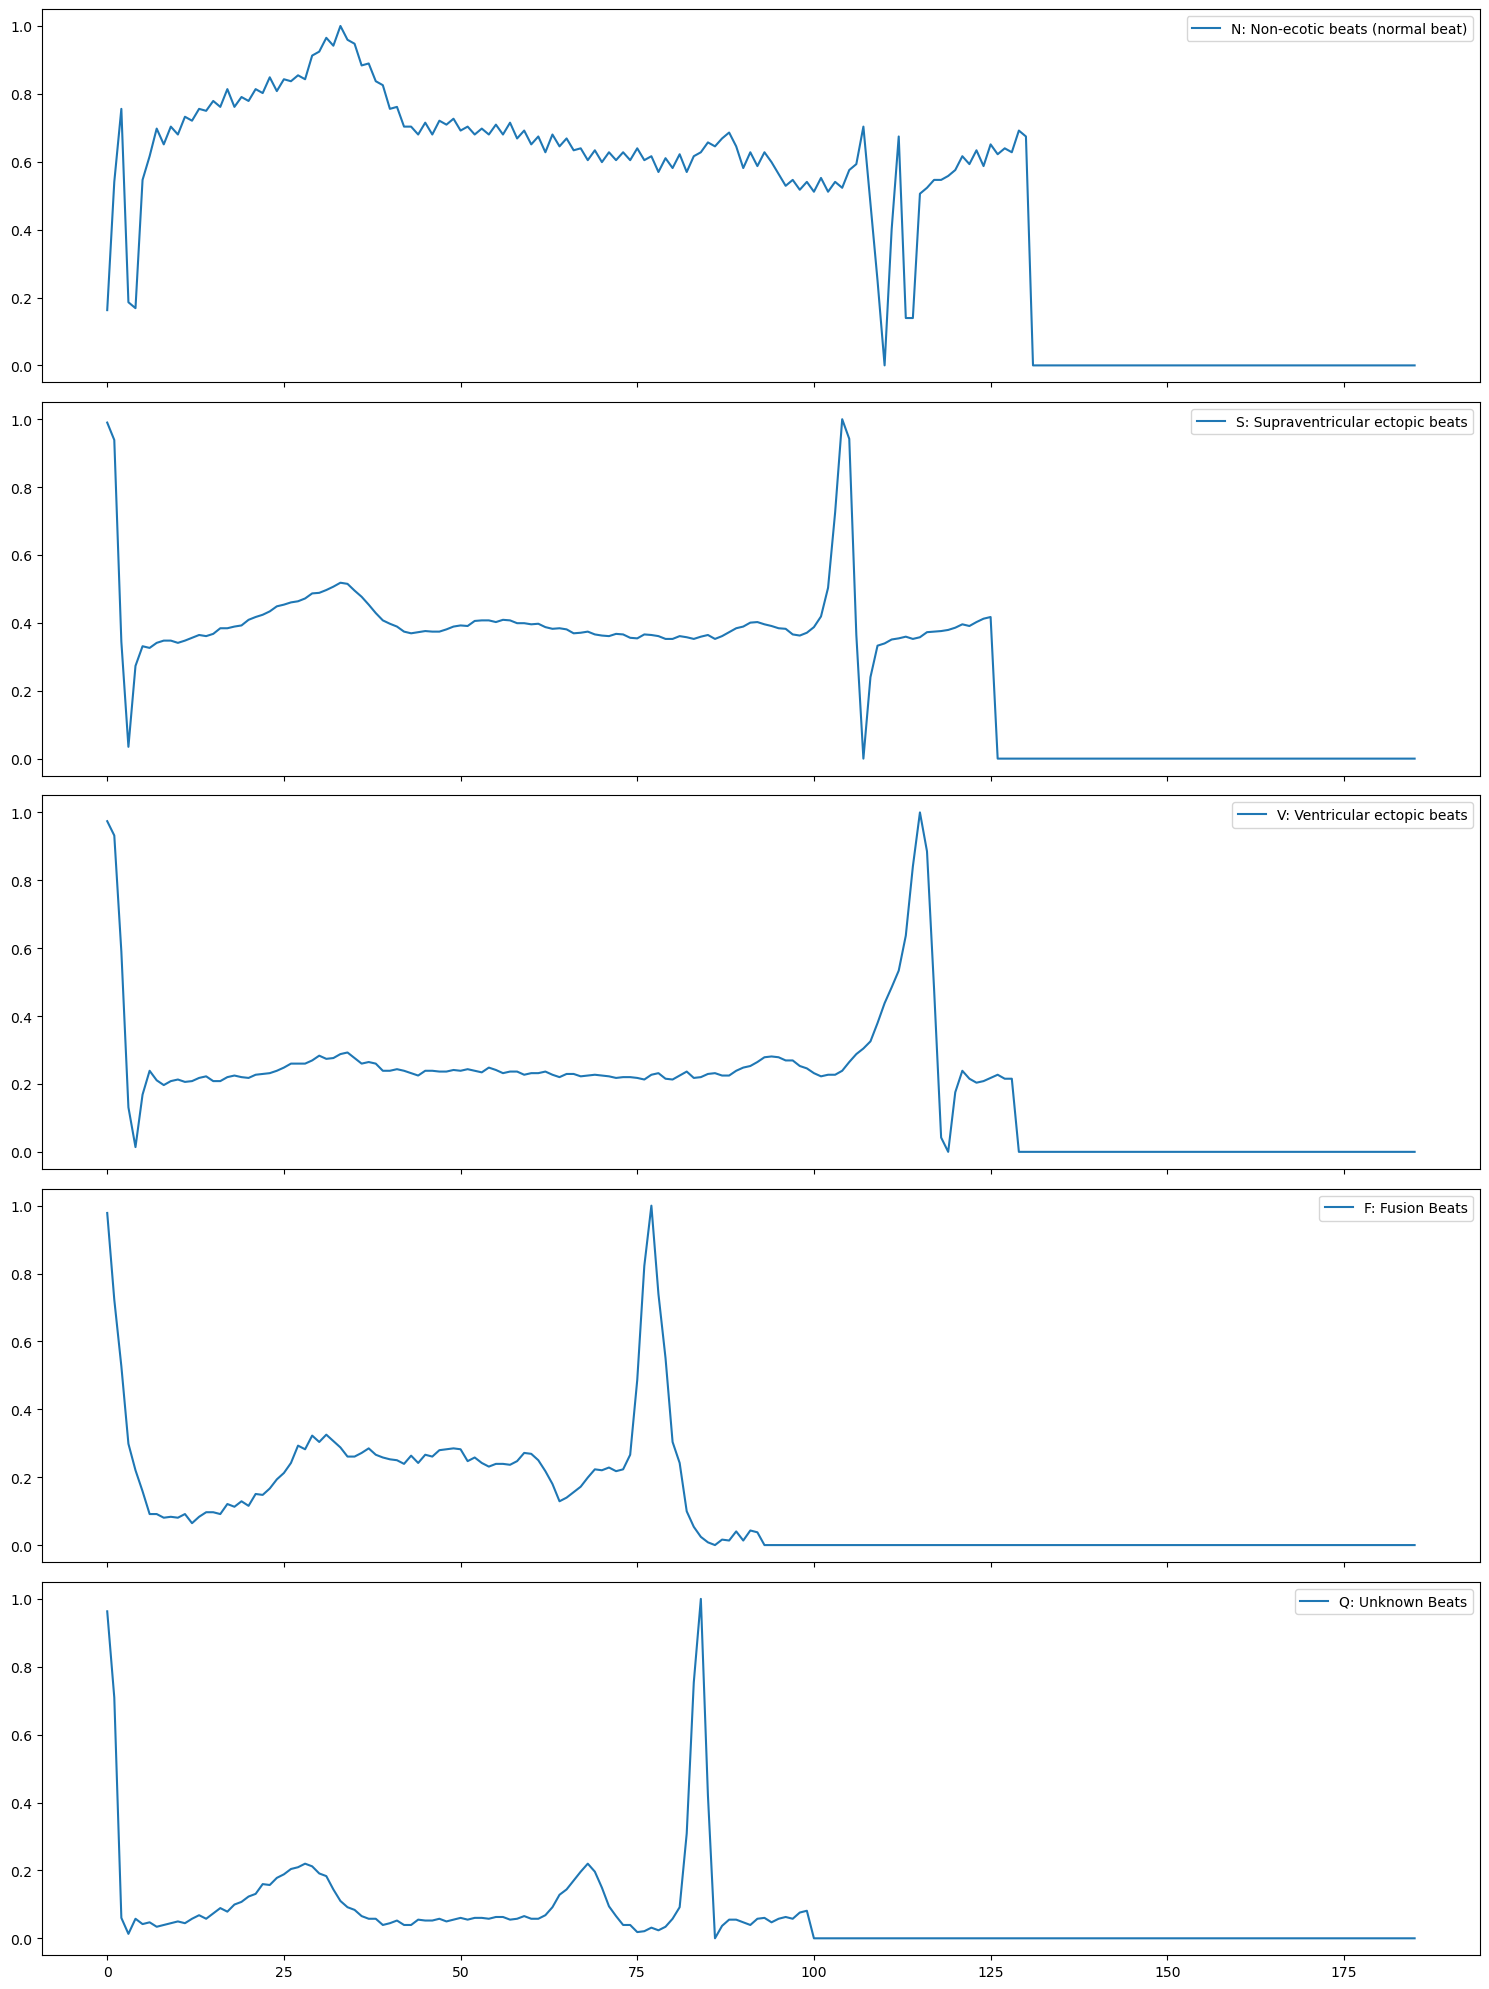

In [16]:
classes = {0: 'N', 1: 'S', 2: 'V', 3: 'F', 4: 'Q'}
class_descriptions = {
    'N': 'Non-ecotic beats (normal beat)',
    'S': 'Supraventricular ectopic beats',
    'V': 'Ventricular ectopic beats',
    'F': 'Fusion Beats',
    'Q': 'Unknown Beats'
}

fig, axs = plt.subplots(5, 1, figsize=(15, 20), sharex=True)

for i in range(5):
    axs[i].plot(train_df.iloc[i, :186], 
                label=f"{classes[i]}: {class_descriptions[classes[i]]}")
    axs[i].legend()

plt.tight_layout()

plt.show()

In [17]:
test = test_df.iloc[0,0:len(test_df.T)-1] # Remove last line cause it might be a Nan
test = pd.DataFrame(test)
# NORMALIZING TEST DATA AMPLITUDE
from sklearn.preprocessing import MinMaxScaler
# load the dataset and print the first 5 rows
# prepare data for normalization
values = test.values
scaler = MinMaxScaler(feature_range=(0, 1))
scaler = scaler.fit(values)
normalized = scaler.transform(values)
normalized = pd.DataFrame(normalized)
normalized

,0
0,0.967089
1,0.686076
2,0.230380
3,0.053165
4,0.083544
...,...
182,0.000000
183,0.000000
184,0.000000
185,0.000000


In [18]:
from tensorflow.keras.optimizers import Adam
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Bidirectional
from keras.layers import Embedding
# from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence



In [19]:

from tensorflow.keras.utils import to_categorical

print("--- X ---")
# X = mit_train_data.loc[:, mit_train_data.columns != 187]
X = train_df.loc[:, mit_train_data.columns != 187]
print(X.head())
print(X.info())

print("--- Y ---")
# y = mit_train_data.loc[:, mit_train_data.columns == 187]
y = train_df.loc[:, mit_train_data.columns == 187]
y = to_categorical(y)

print("--- testX ---")
#testX = mit_test_data.loc[:, mit_test_data.columns != 187]
testX = test_df.loc[:, mit_test_data.columns != 187]
print(testX.head())
print(testX.info())

print("--- testy ---")
#testy = mit_test_data.loc[:, mit_test_data.columns == 187]
testy = test_df.loc[:, mit_test_data.columns == 187]
testy = to_categorical(testy)

--- X ---
            0         1         2         3         4         5         6    \
10153  0.162791  0.540698  0.755814  0.186047  0.168605  0.546512  0.616279   
33886  0.990066  0.938742  0.344371  0.034768  0.273179  0.331126  0.326159   
32005  0.974239  0.932084  0.590164  0.131148  0.014052  0.168618  0.238876   
56159  0.978495  0.723118  0.526882  0.298387  0.220430  0.158602  0.091398   
61783  0.963351  0.709424  0.060209  0.013089  0.057592  0.041885  0.047120   

            7         8         9    ...  177  178  179  180  181  182  183  \
10153  0.697674  0.651163  0.703488  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
33886  0.341060  0.347682  0.347682  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
32005  0.210773  0.196721  0.208431  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
56159  0.091398  0.080645  0.083333  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
61783  0.034031  0.039267  0.044503  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

       184  185  186  
10153  0.0  0.0  

In [20]:
# create the model.
from keras.callbacks import History 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import time
history = History()
embedding_vecor_length = 187
print("------------------------Nural Network------------------------")
model = Sequential()
start = time.time()
model.add(Dense(50, activation='relu', input_shape=(187,)))
model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history=model.fit(X, y, epochs=12)
end = time.time()
print("Evaluation: ")
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)
print(f'Nural Network took {end-start} seconds to run\n')
      
print("------------------------DECISION TREE------------------------")
start = time.time()
dt = DecisionTreeClassifier(max_depth = 9).fit(X, y)
print('Accuracy of Decision Tree is', dt.score(testX, testy))
end = time.time()    
print(f'Decision Tree took {end-start} seconds to run\n')
      
# print("------------------------Random Forest------------------------")  
# start = time.time()
# rf = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42)
# rf.fit(X, y)
# print('Accuracy of Random Forest is', rf.score(testX, testy))
# end = time.time()
# print(f'Random Forest took {end-start} seconds to run\n')

------------------------Nural Network------------------------
Epoch 1/12
2813/2813 [==============================] - 6s 2ms/step - loss: 0.4891 - accuracy: 0.8215
Epoch 2/12
2813/2813 [==============================] - 4s 1ms/step - loss: 0.3021 - accuracy: 0.8891
Epoch 3/12
2813/2813 [==============================] - 4s 2ms/step - loss: 0.2460 - accuracy: 0.9106
Epoch 4/12
2813/2813 [==============================] - 4s 1ms/step - loss: 0.2097 - accuracy: 0.9247
Epoch 5/12
2813/2813 [==============================] - 3s 1ms/step - loss: 0.1824 - accuracy: 0.9358
Epoch 6/12
2813/2813 [==============================] - 3s 1ms/step - loss: 0.1642 - accuracy: 0.9430
Epoch 7/12
2813/2813 [==============================] - 4s 1ms/step - loss: 0.1494 - accuracy: 0.9483
Epoch 8/12
2813/2813 [==============================] - 3s 1ms/step - loss: 0.1371 - accuracy: 0.9530
Epoch 9/12
2813/2813 [==============================] - 4s 1ms/step - loss: 0.1277 - accuracy: 0.9558
Epoch 10/12
2813/281

KeyboardInterrupt: 

In [ ]:
mse, acc = model.evaluate(testX, testy)
print('mean_squared_error :', mse)
print('accuracy:', acc)

dict_keys(['loss', 'accuracy'])


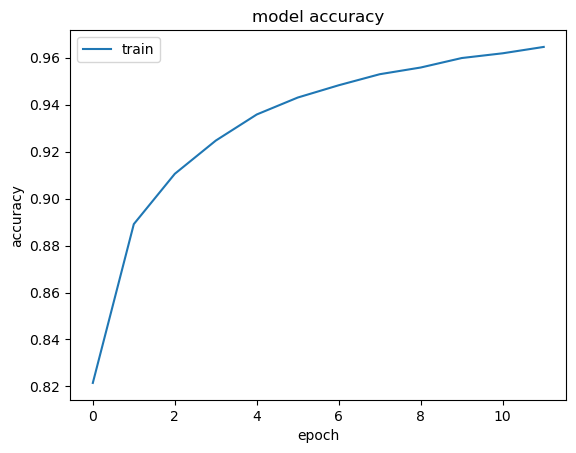

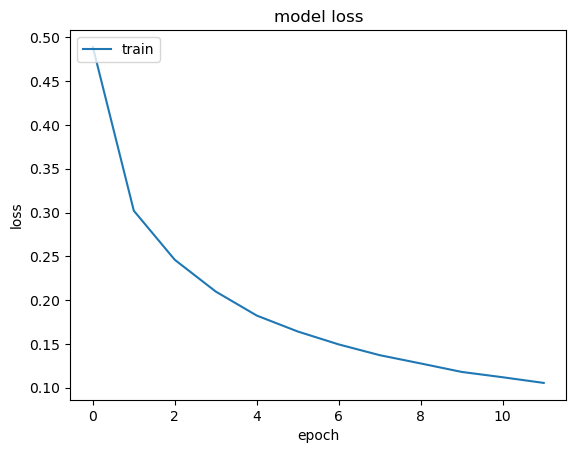

In [21]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [26]:
y_pred = model.predict(testX, batch_size=1000)
y_pred

90/90 [==============================] - 0s 1ms/step


array([[9.8951173e-01, 1.0356655e-02, 1.3147472e-04, 1.2405746e-07,
        5.3443712e-09],
       [2.5268218e-01, 7.3174226e-01, 1.5575654e-02, 2.1497739e-16,
        9.2916412e-09],
       [9.9829531e-01, 1.7039333e-03, 9.2471018e-09, 6.6582209e-07,
        4.0534881e-10],
       ...,
       [1.4249550e-06, 2.3682020e-08, 2.2860480e-07, 4.0956717e-20,
        9.9999827e-01],
       [1.4342861e-07, 2.6625610e-10, 8.1280973e-08, 3.2059591e-24,
        9.9999970e-01],
       [4.9790503e-07, 1.9301021e-09, 3.1808281e-04, 2.7167407e-31,
        9.9968147e-01]], dtype=float32)

90/90 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.91      0.86     18000
           1       0.91      0.83      0.87     18000
           2       0.90      0.95      0.92     18000
           3       0.96      0.91      0.93     18000
           4       0.99      0.97      0.98     18000

    accuracy                           0.91     90000
   macro avg       0.92      0.91      0.91     90000
weighted avg       0.92      0.91      0.91     90000



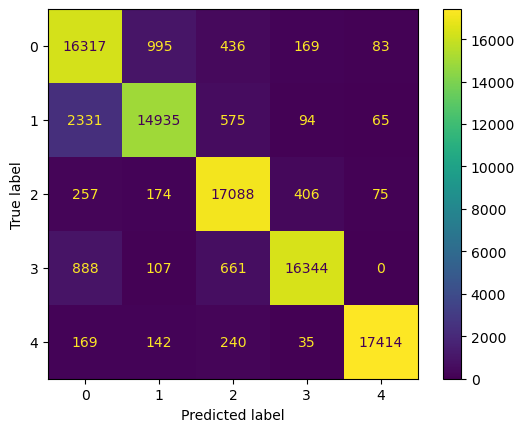

In [22]:


from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error 

print(classification_report(testy.argmax(axis=1), y_pred.argmax(axis=1)))

cm = confusion_matrix(testy.argmax(axis=1), y_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.85      0.75     18000
           1       0.88      0.74      0.80     18000
           2       0.85      0.85      0.85     18000
           3       0.91      0.79      0.85     18000
           4       0.94      0.93      0.93     18000

    accuracy                           0.83     90000
   macro avg       0.85      0.83      0.84     90000
weighted avg       0.85      0.83      0.84     90000



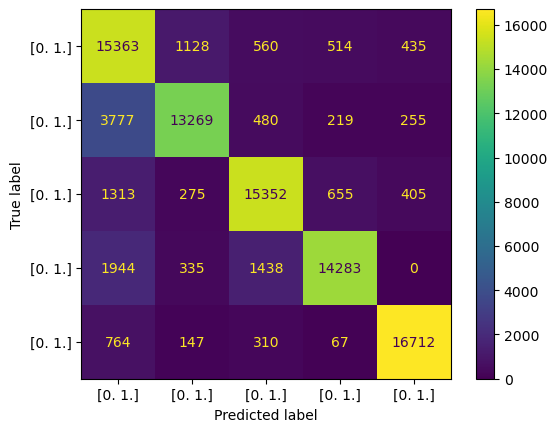

In [72]:
ydt_pred = dt.predict(testX) 

print(classification_report(testy.argmax(axis=1), ydt_pred.argmax(axis=1)))
cm = confusion_matrix(testy.argmax(axis=1), ydt_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.66      0.85      0.75     18000
           1       0.88      0.74      0.80     18000
           2       0.85      0.85      0.85     18000
           3       0.91      0.79      0.85     18000
           4       0.94      0.93      0.93     18000

    accuracy                           0.83     90000
   macro avg       0.85      0.83      0.84     90000
weighted avg       0.85      0.83      0.84     90000



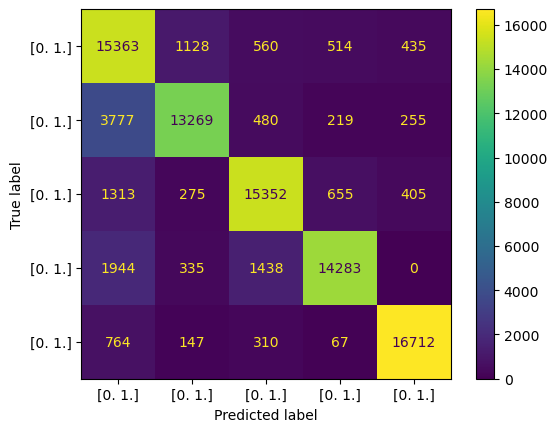

In [73]:
yrf_pred = dt.predict(testX) 

print(classification_report(testy.argmax(axis=1), yrf_pred.argmax(axis=1)))
cm = confusion_matrix(testy.argmax(axis=1), yrf_pred.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = dt.classes_)
disp.plot()
plt.show()

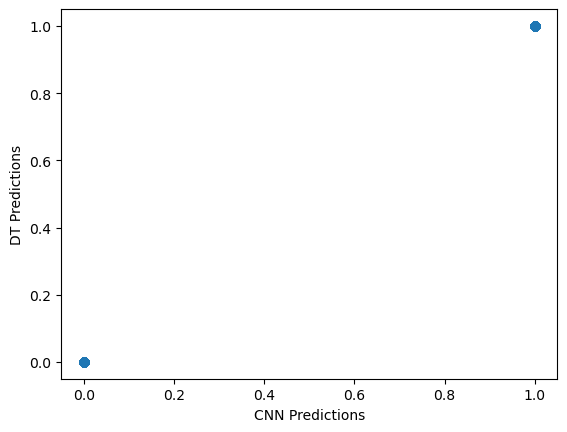

In [31]:
plt.scatter(y_pred, ydt_pred)
plt.xlabel('CNN Predictions')
plt.ylabel('DT Predictions')
plt.show()